In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns 
import matplotlib as mpl 

In [7]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 300

In [1]:
original_data = pd.read_csv('reviews_merged.csv', encoding='gbk')
original_data.head(5)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,salesRank,imUrl,categories,title,description,price,related,brand
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4,Good Taste,1370044800,"06 1, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4,Yum!,1381190400,"10 8, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5,Unexpected flavor meld,1369008000,"05 20, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013",{'Grocery & Gourmet Food': 37305},http://ecx.images-amazon.com/images/I/51LdEao6...,[['Grocery & Gourmet Food']],Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,Green Tea Flavor Kit Kat have quickly become t...,NaN,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",NaN


In [2]:
# Change string to dictionary
import ast
most_asin = original_data['title'].tolist()
most_asin

['Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese Kit Kat Maccha Green Tea Flavor (5 Bag) (4.91oz x 5)',
 'Japanese

In [4]:
# Get the mean price of each asin and fillin the empty data
diffasin = list(set(original_data['asin']))
all_length = len(original_data)
meanprice = []
for asin in diffasin:
    meanprice.append(original_data[original_data['asin']  == asin]['price'].mean())

In [8]:
meanpriceint = []
for i in meanprice:
    if i is np.nan:
        i = 0
    meanpriceint.append(i)
while 0 in meanpriceint:
    meanpriceint.remove(0)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


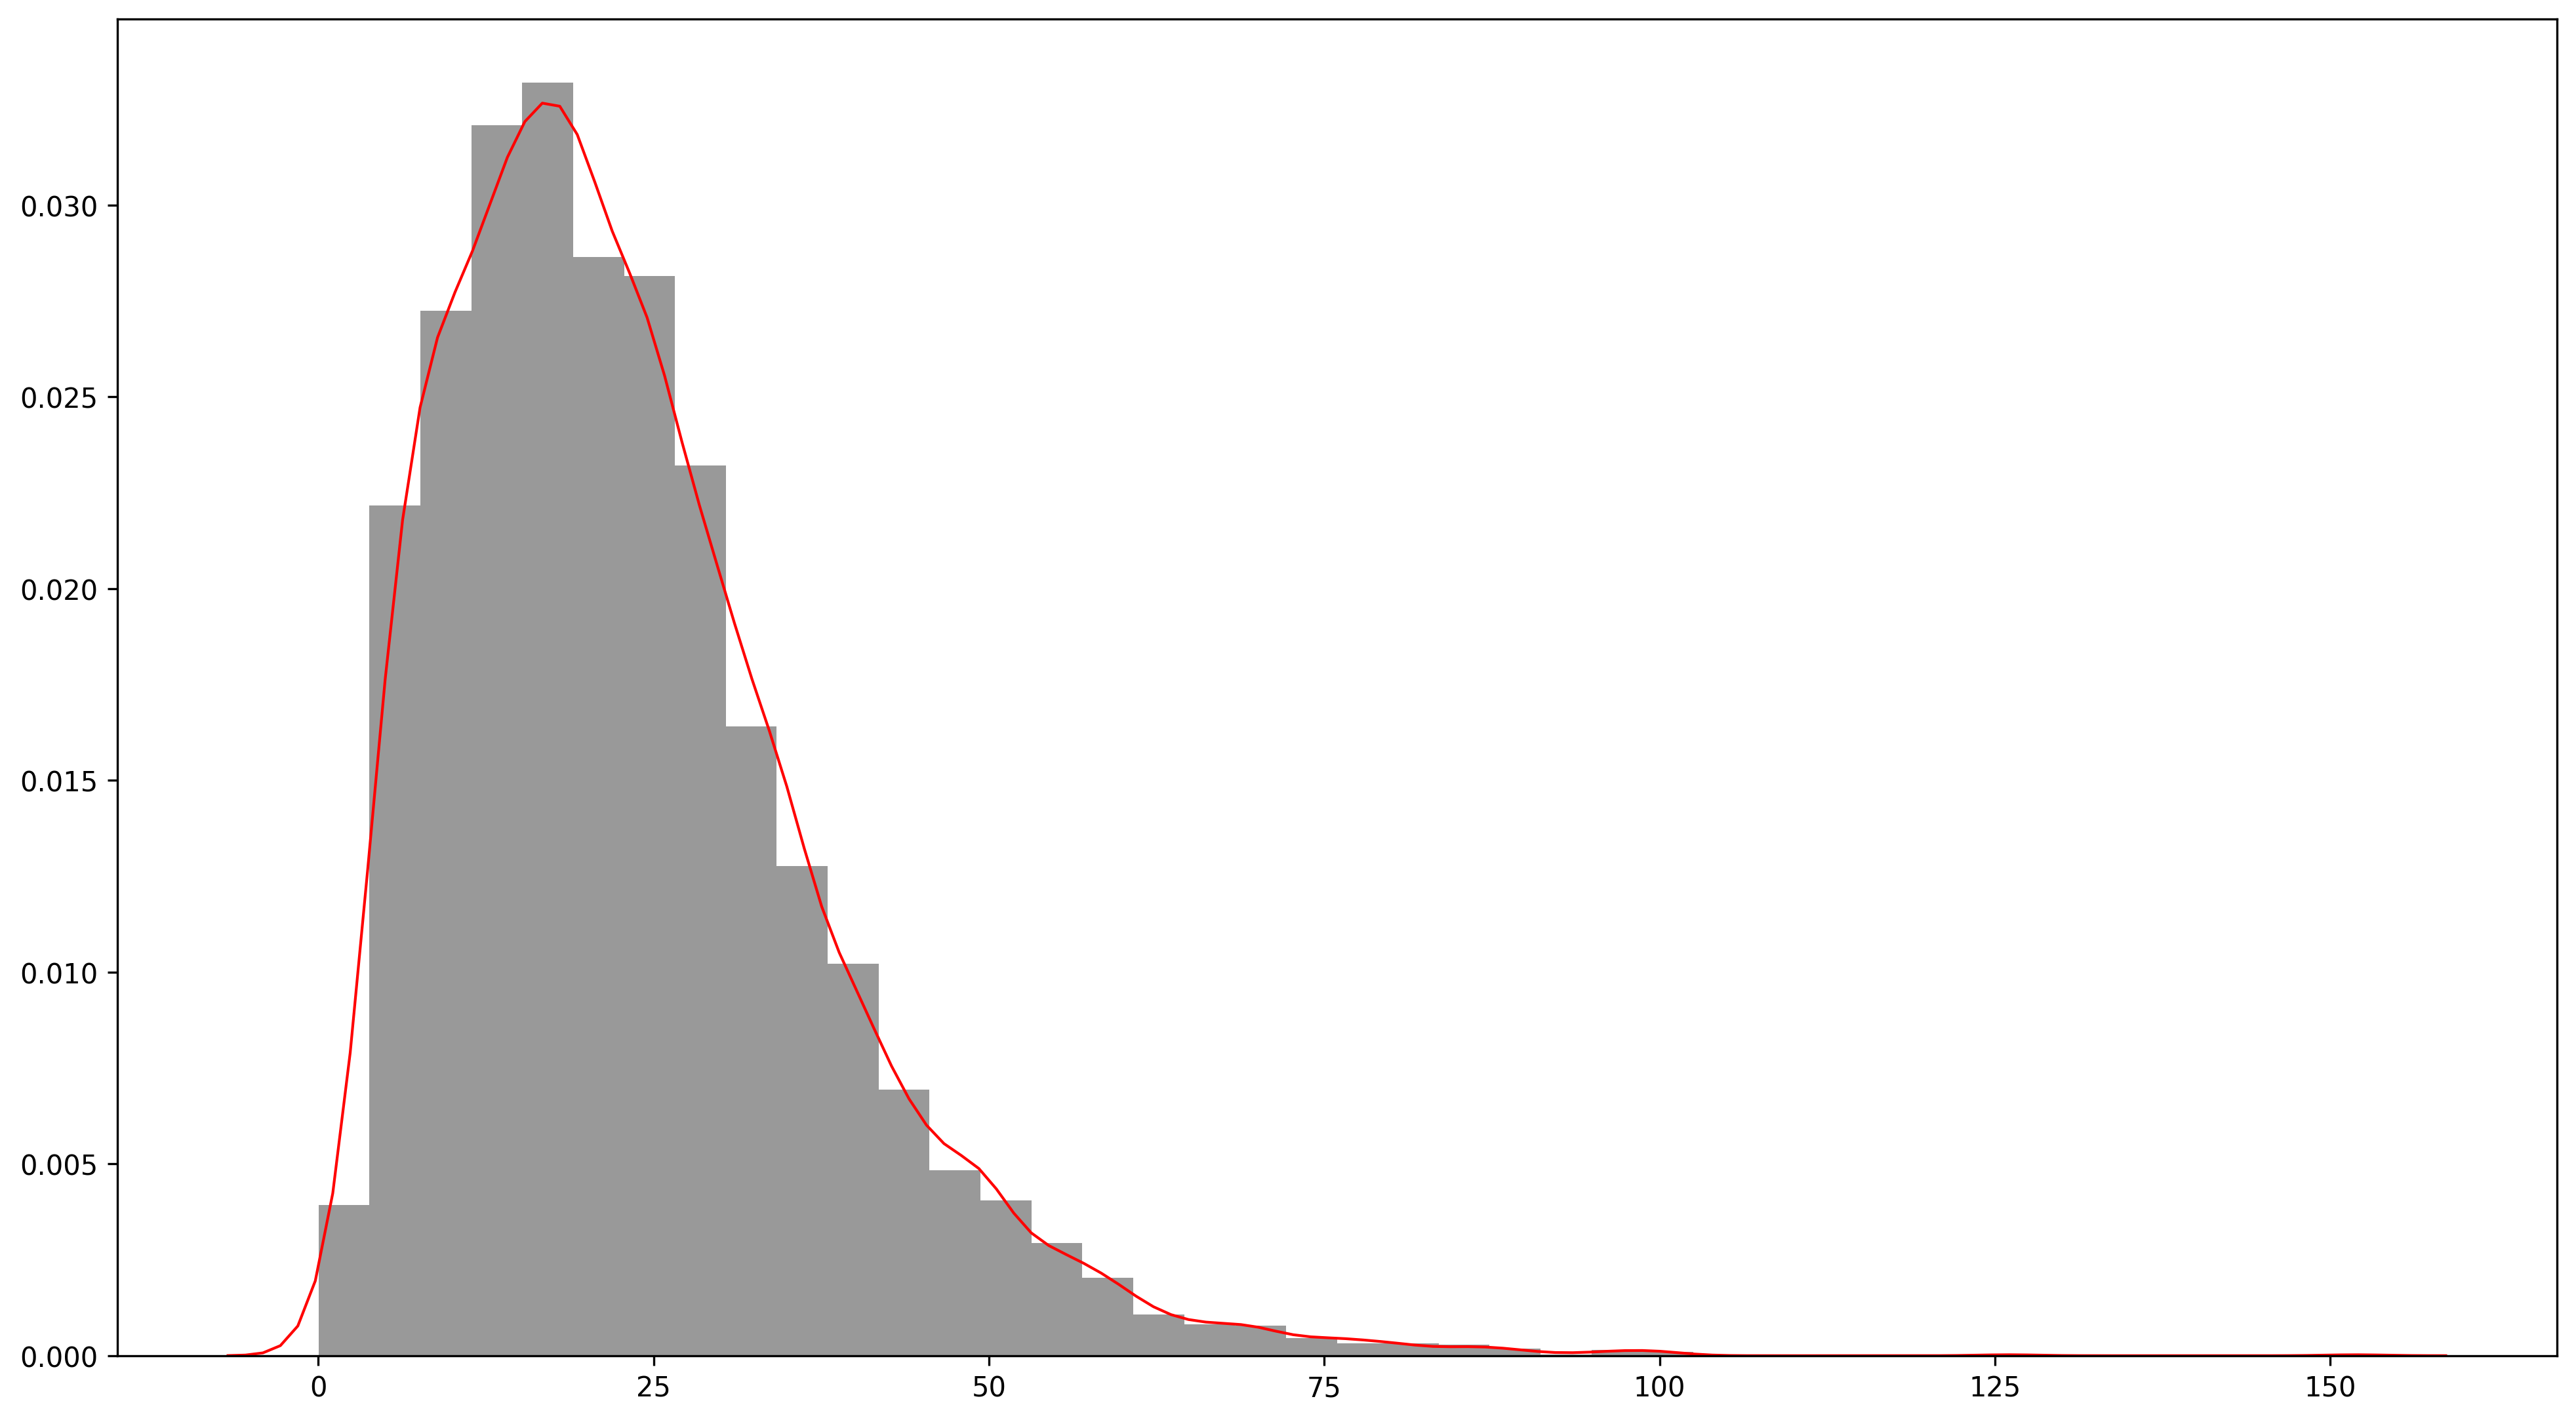

In [17]:
mpl.rc("figure", figsize=(16,9))  
sns.set_palette("hls") 
sns.distplot(meanpriceint,color="r",bins=40, kde_kws={"color":"r", "lw":1 }, hist_kws={ "color": "black" })
plt.savefig('meanprice_hist.png',  bbox_inches = 'tight')
plt.show()

In [11]:
original_data['title'].value_counts()

Pure Bar Organic Chocolate Brownie, Gluten Free, Raw, Vegan,  1.7-Ounce Bars (Pack of 12)                                            742
illy issimo Coffee Drink, Cappuccino, 8.45-Ounce Cans (Pack of 12)                                                                   741
Peeled Snacks Organic Apple Clusters, Cinnamon Crunch, 60 Gram                                                                       476
Vitamin Squeeze Energy Drink, Fruit Punch, 12-Ounce (Pack of 4)                                                                      468
Starbucks Natural Fusions Ground Coffee, Vanilla Flavored, 11-Ounce Packages (Pack of 2)                                             445
Gold Kili All Natural Instant Ginger &amp; Lemon Beverage Mix, 6.72-Ounce Boxes (Pack of 6)                                          438
Kraft Velveeta Ultimate Cheesburger Skillets Dinner Kit, 12.86-Ounce (Pack of 6)                                                     428
Lipton Herbal Pyramid Tea Bags, Blackberr

In [12]:
# Mean overall of each reviewer
diffreviewerID = list(set(original_data['reviewerID']))
meanstar = []
for reviewerID in diffreviewerID:
    meanstar.append(original_data[original_data['reviewerID']  == reviewerID]['overall'].mean())

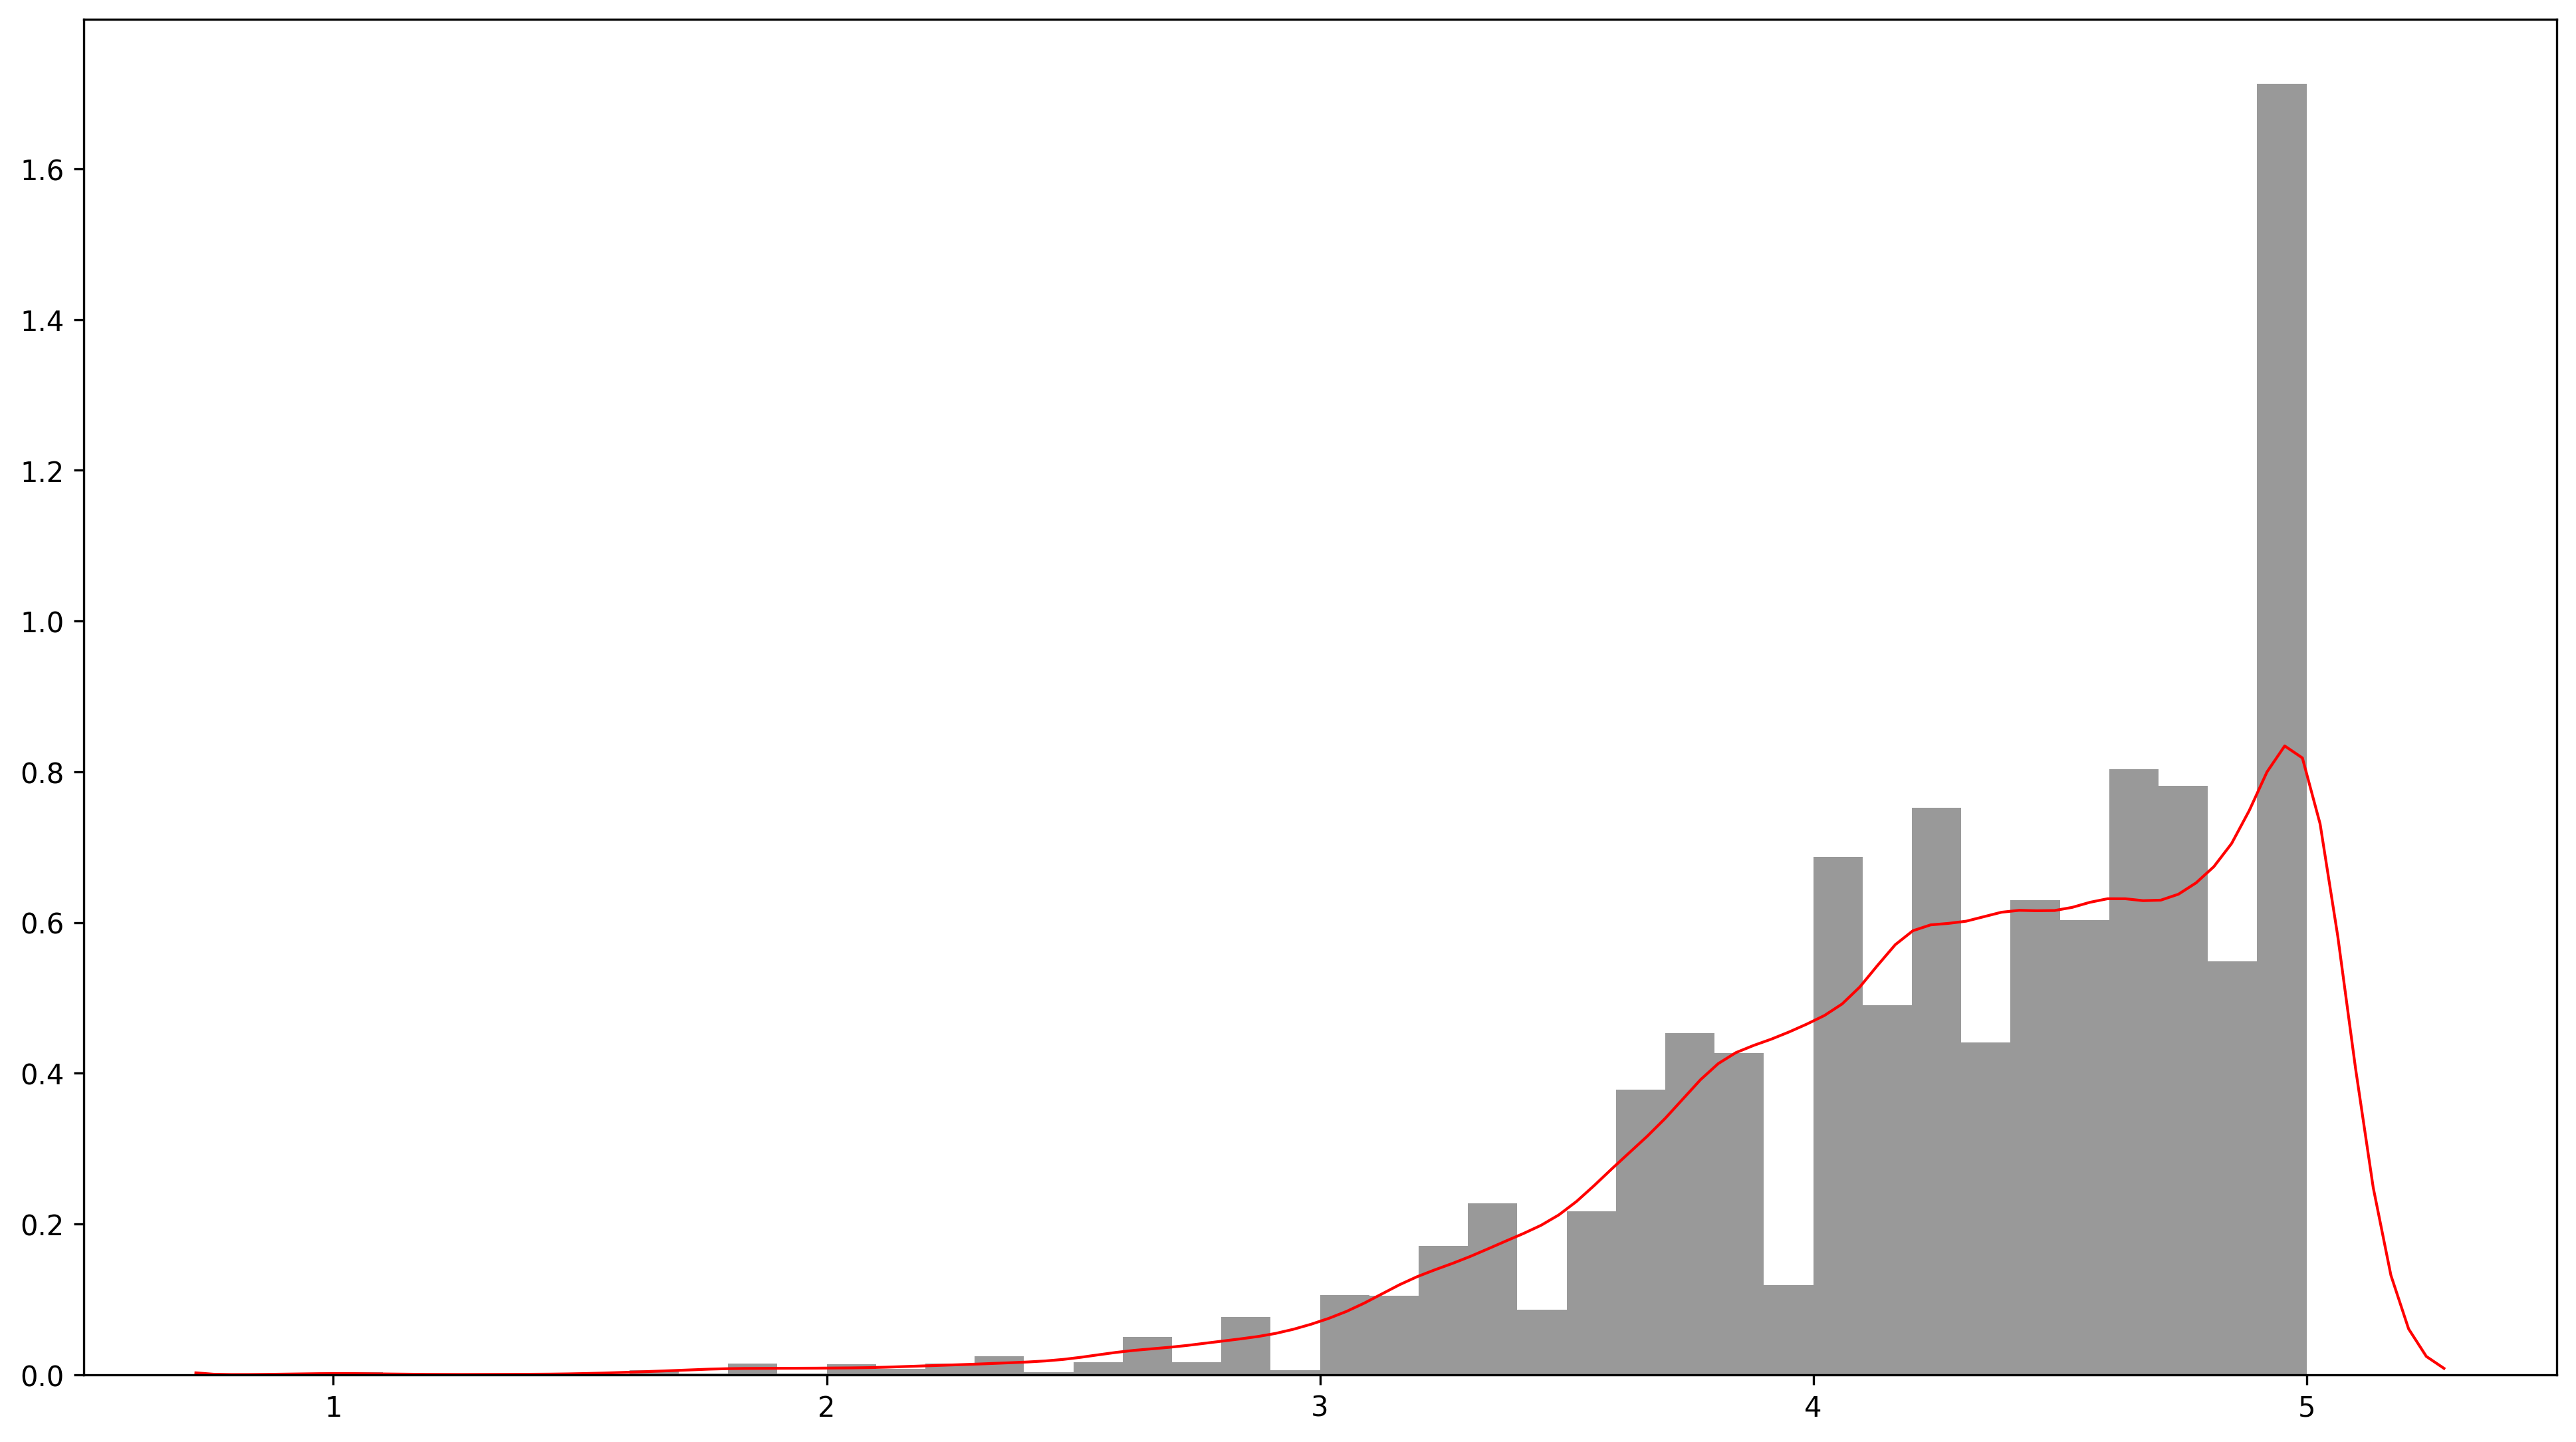

In [16]:
mpl.rc("figure", figsize=(16,9)) 
sns.set_palette("hls") 
sns.distplot(meanstar,color="r",bins=40, kde_kws={"color":"red", "lw":1 }, hist_kws={ "color": "black" })
plt.savefig('meanstar_hist.png', bbox_inches = 'tight')
plt.show()

In [18]:
# Word Cloud
import re

reviewtext= original_data['summary'].tolist()
text_word = []
for word in reviewtext:
    each_review = re.split('[, ]', word)
    for each in each_review:
        text_word.append(each)

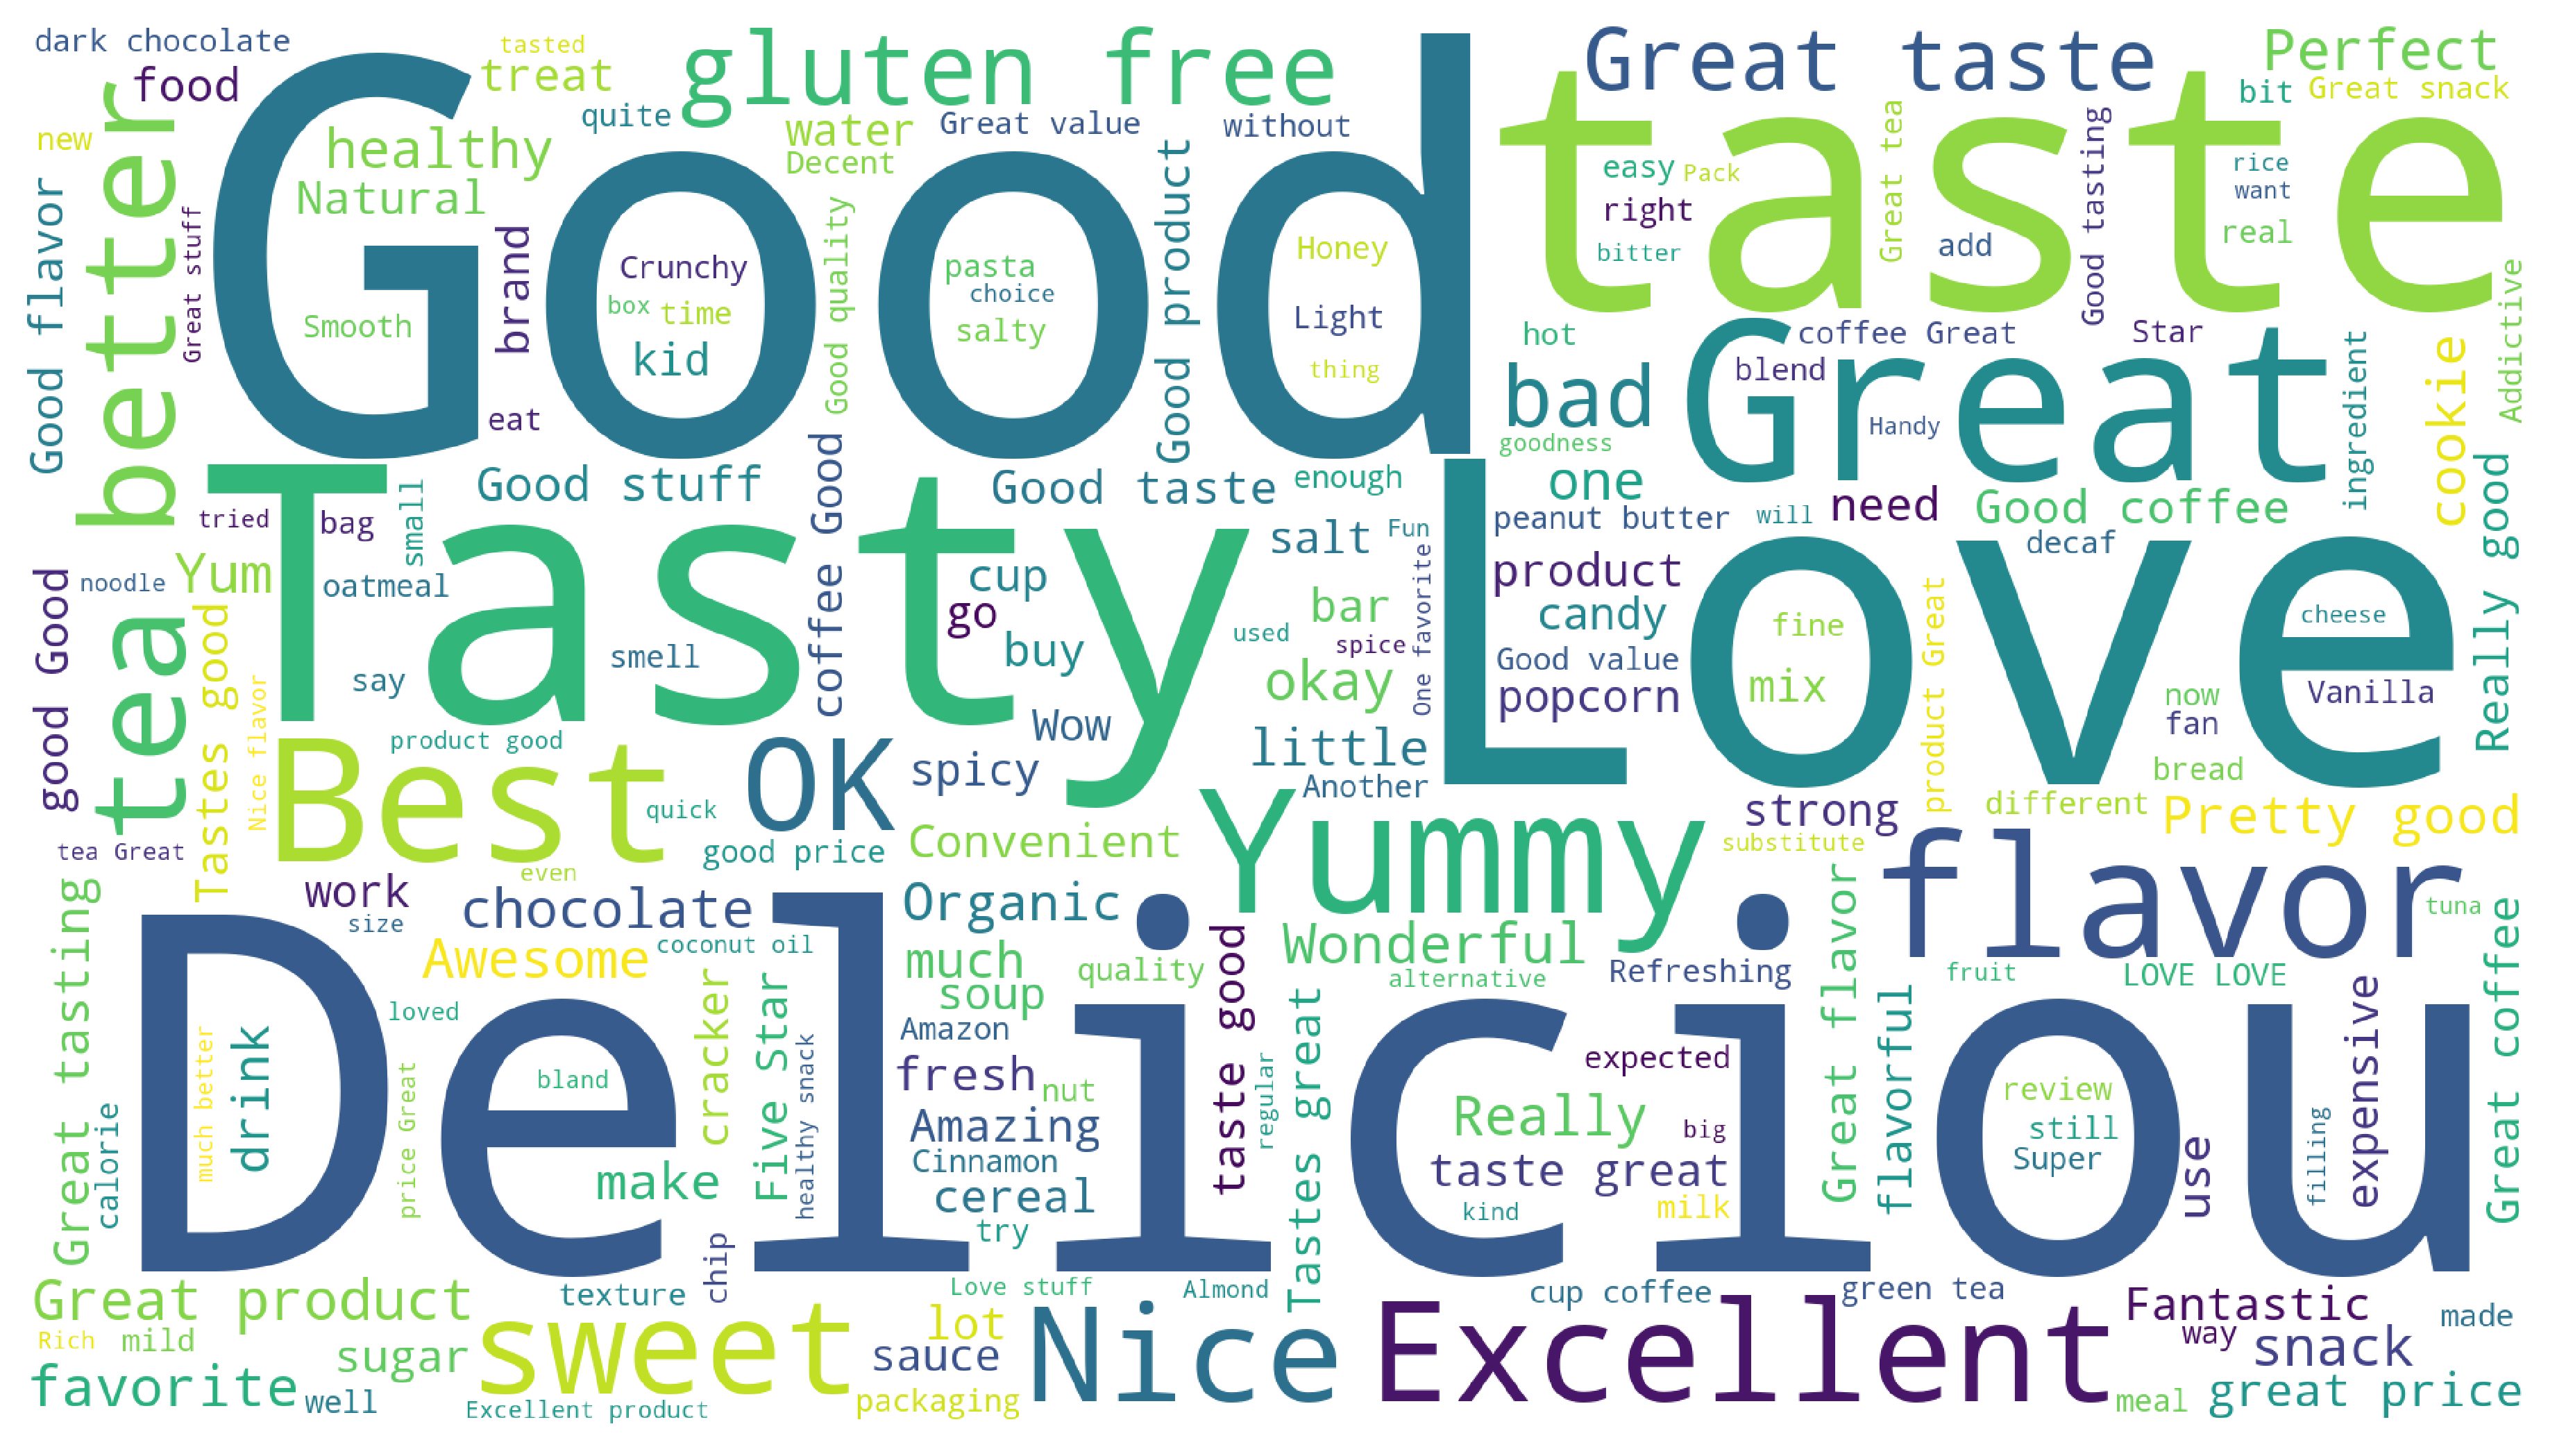

In [19]:
# Plot the wordcloud
from wordcloud import WordCloud

f = (' '.join(text_word))
wordcloud = WordCloud(
        background_color="white",
        width=1920,              
        height=1080,             
        margin=10               
        ).generate(f)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('review_text.png')
plt.show()

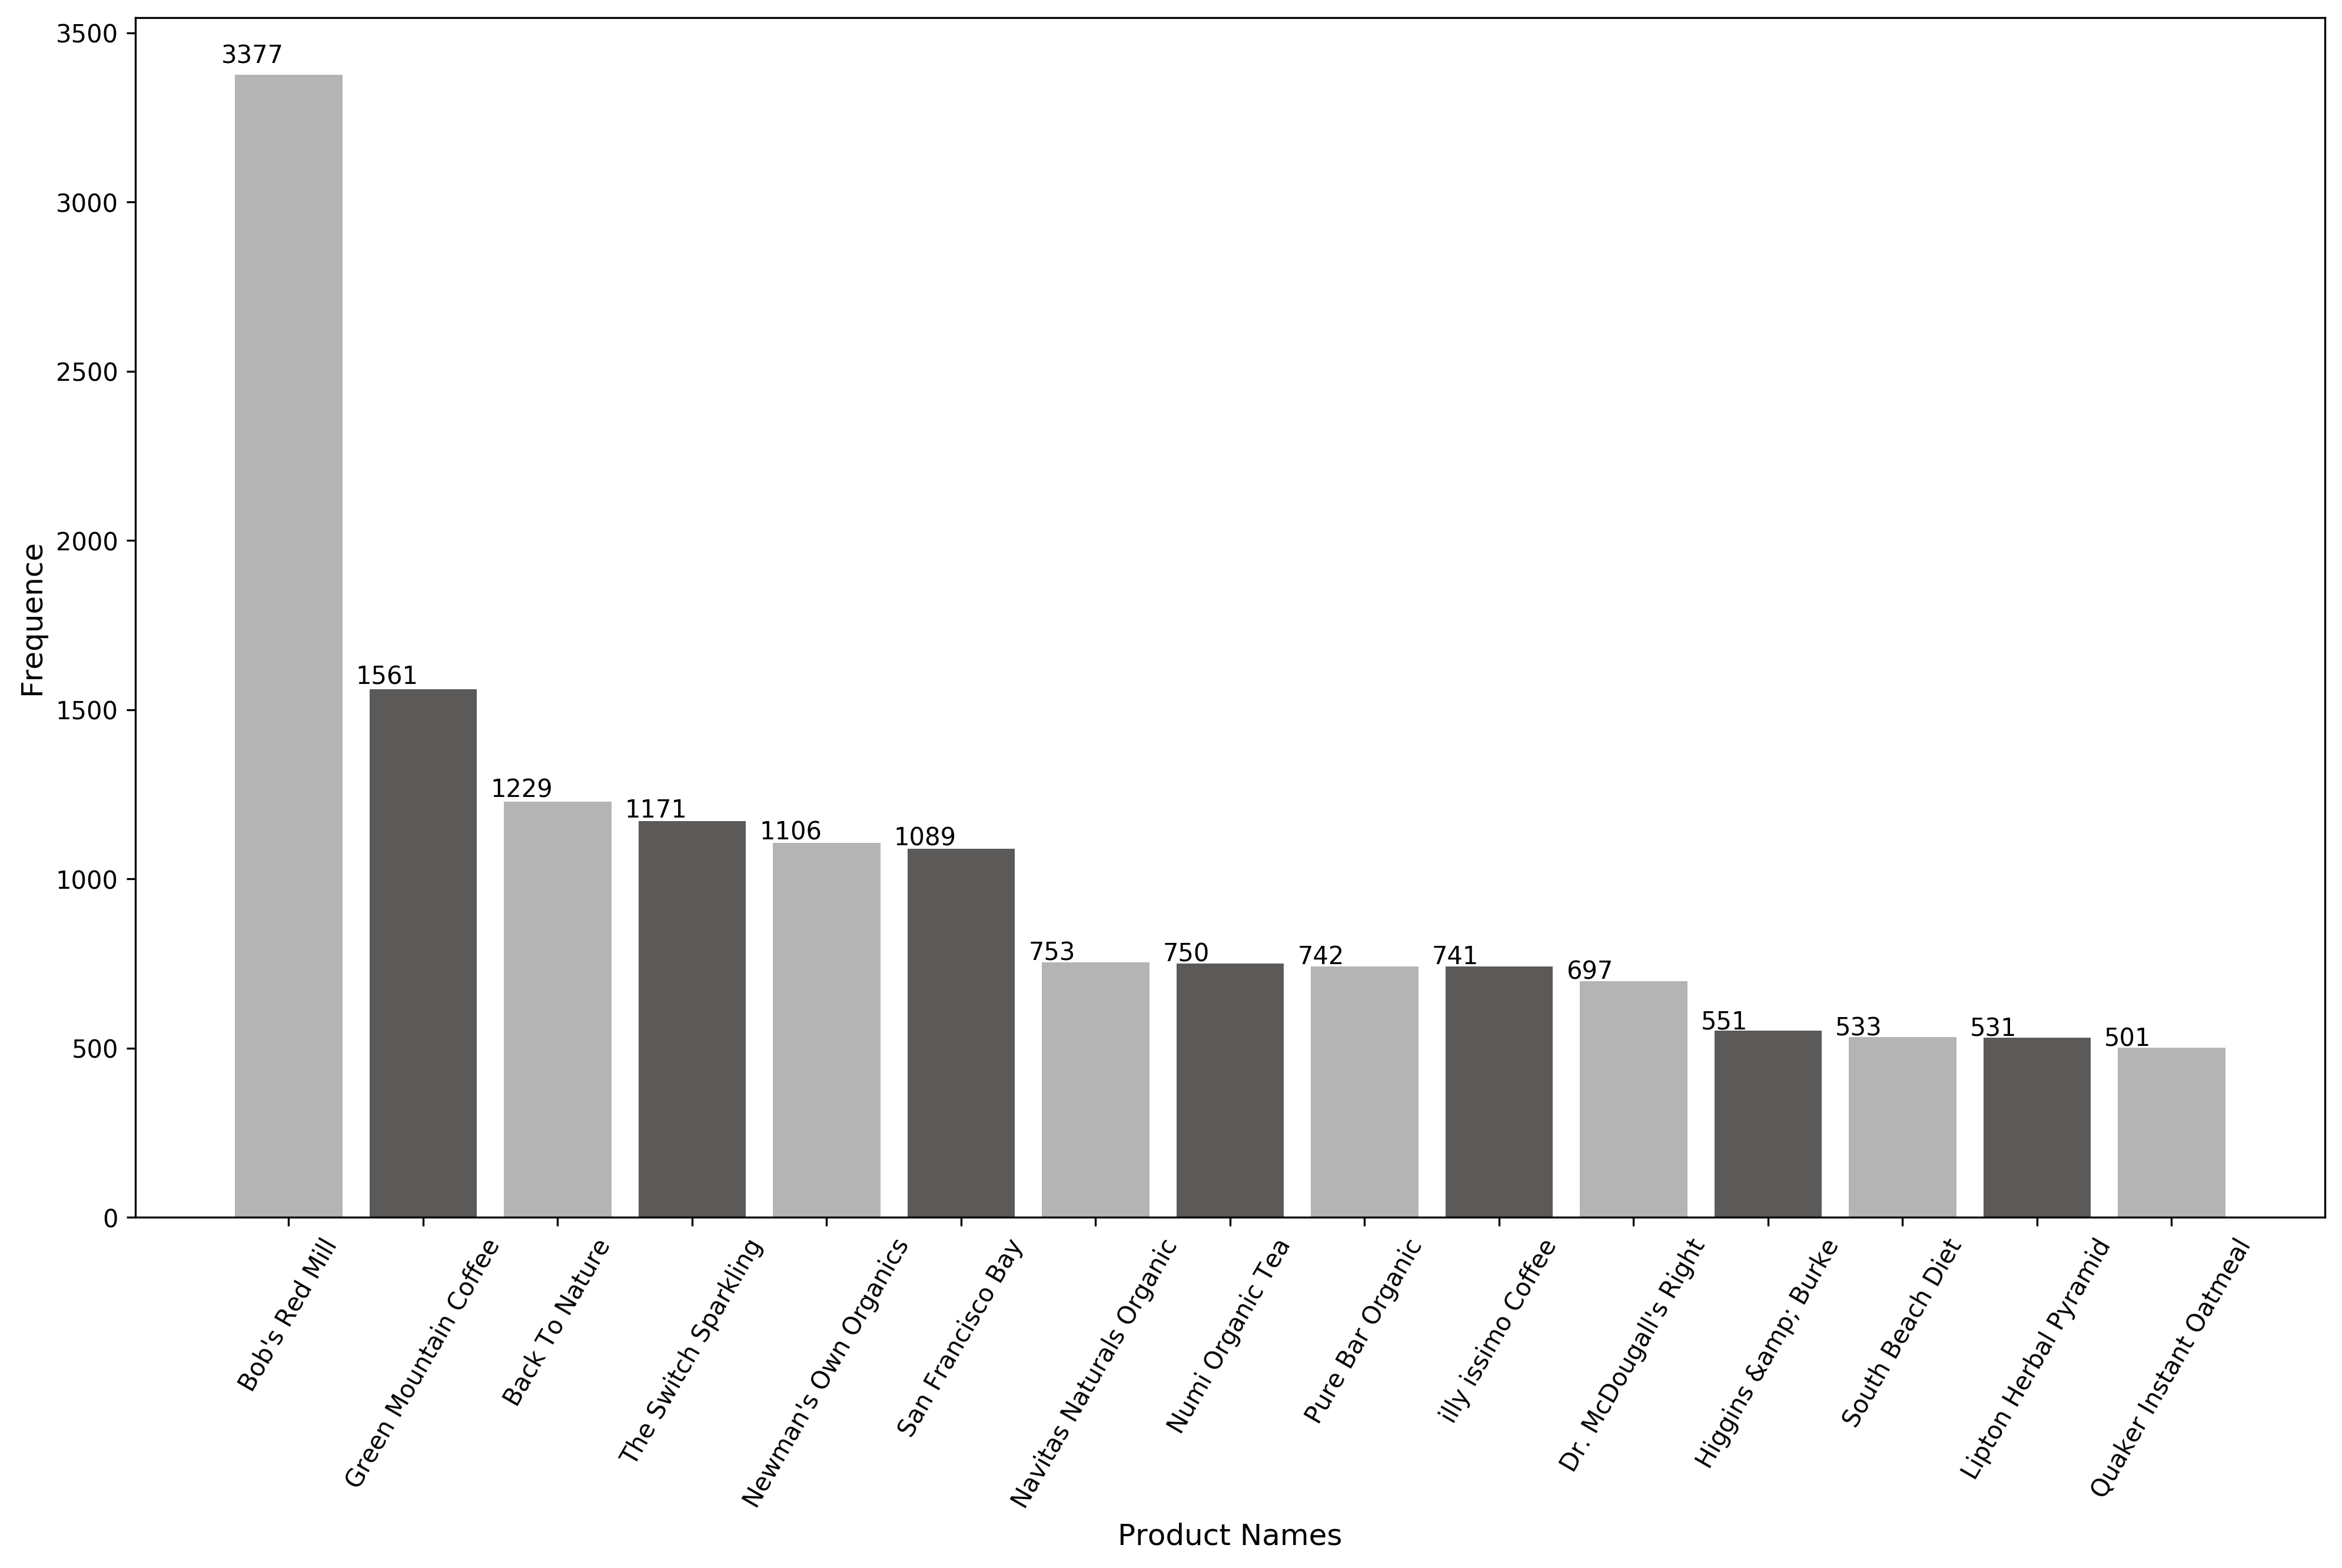

In [60]:
from collections import Counter
import pylab as pl

# Get the first three words from title and link it with asin
title_list = original_data['title'].tolist()
product_name = []
for title in title_list:
    temp = str(title).split(' ')[0:3]
    key_name = (' '.join(temp))
    product_name.append(key_name)

original_data['product_name'] = product_name

# Look at the top 15 most popular products
mostreview_productname = Counter(original_data['product_name']).most_common(15)
name = []
freq = []
for i in mostreview_productname:
    name.append(i[0])
    freq.append(i[1])

a = plt.bar(name, freq, color=['#a3a1a1','#333030'],alpha=0.8)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2-0.5, 1.01*height, '%s' % int(height))

pl.xticks(rotation=60)
autolabel(a)
plt.ylabel('Frequence', fontsize=12) 
plt.xlabel('Product Names', fontsize=12) 
plt.savefig('reviewfreq.png', bbox_inches = 'tight')

In [35]:
# Transform helpful to numerical and calculate the ratio
help_list = original_data['helpful'].tolist()
HaveSeen = []
feelnice = []
for i in help_list:
    HaveSeen.append(i[4])# Capture number of viewers   
    feelnice.append(i[1])# Capture number of helpfuls
helpful_rate = []
for i in range(len(HaveSeen)):
    if HaveSeen[i] != '0' and HaveSeen[i] != ' ' and HaveSeen[i] != ',':
        if int(HaveSeen[i]) > 5:
            rate = int(feelnice[i]) / int(HaveSeen[i])
            helpful_rate.append(rate)

print(helpful_rate)

[0.75, 0.8333333333333334, 0.8888888888888888, 0.25, 0.2857142857142857, 0.8571428571428571, 1.0, 0.8888888888888888, 0.8333333333333334, 0.8571428571428571, 0.5714285714285714, 0.42857142857142855, 1.0, 1.0, 0.6666666666666666, 0.14285714285714285, 0.3333333333333333, 0.8333333333333334, 1.0, 0.5, 0.5555555555555556, 1.0, 1.0, 1.0, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.8333333333333334, 0.5714285714285714, 0.125, 0.7142857142857143, 0.5, 0.6666666666666666, 0.75, 1.0, 1.0, 1.0, 0.75, 1.0, 0.75, 1.0, 1.0, 0.42857142857142855, 0.75, 0.8333333333333334, 0.8571428571428571, 0.7142857142857143, 0.8888888888888888, 1.0, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0, 0.7142857142857143, 0.8333333333333334, 0.3333333333333333, 1.0, 1.0, 0.8571428571428571, 0.7777777777777778, 0.6666666666666666, 0.75, 0.625, 0.6666666666666666, 1.0, 0.8333333333333334, 0.4444444444444444, 0.5, 0.5714285714285714, 0.5555555555555556, 0.5714285714285714, 0.5, 

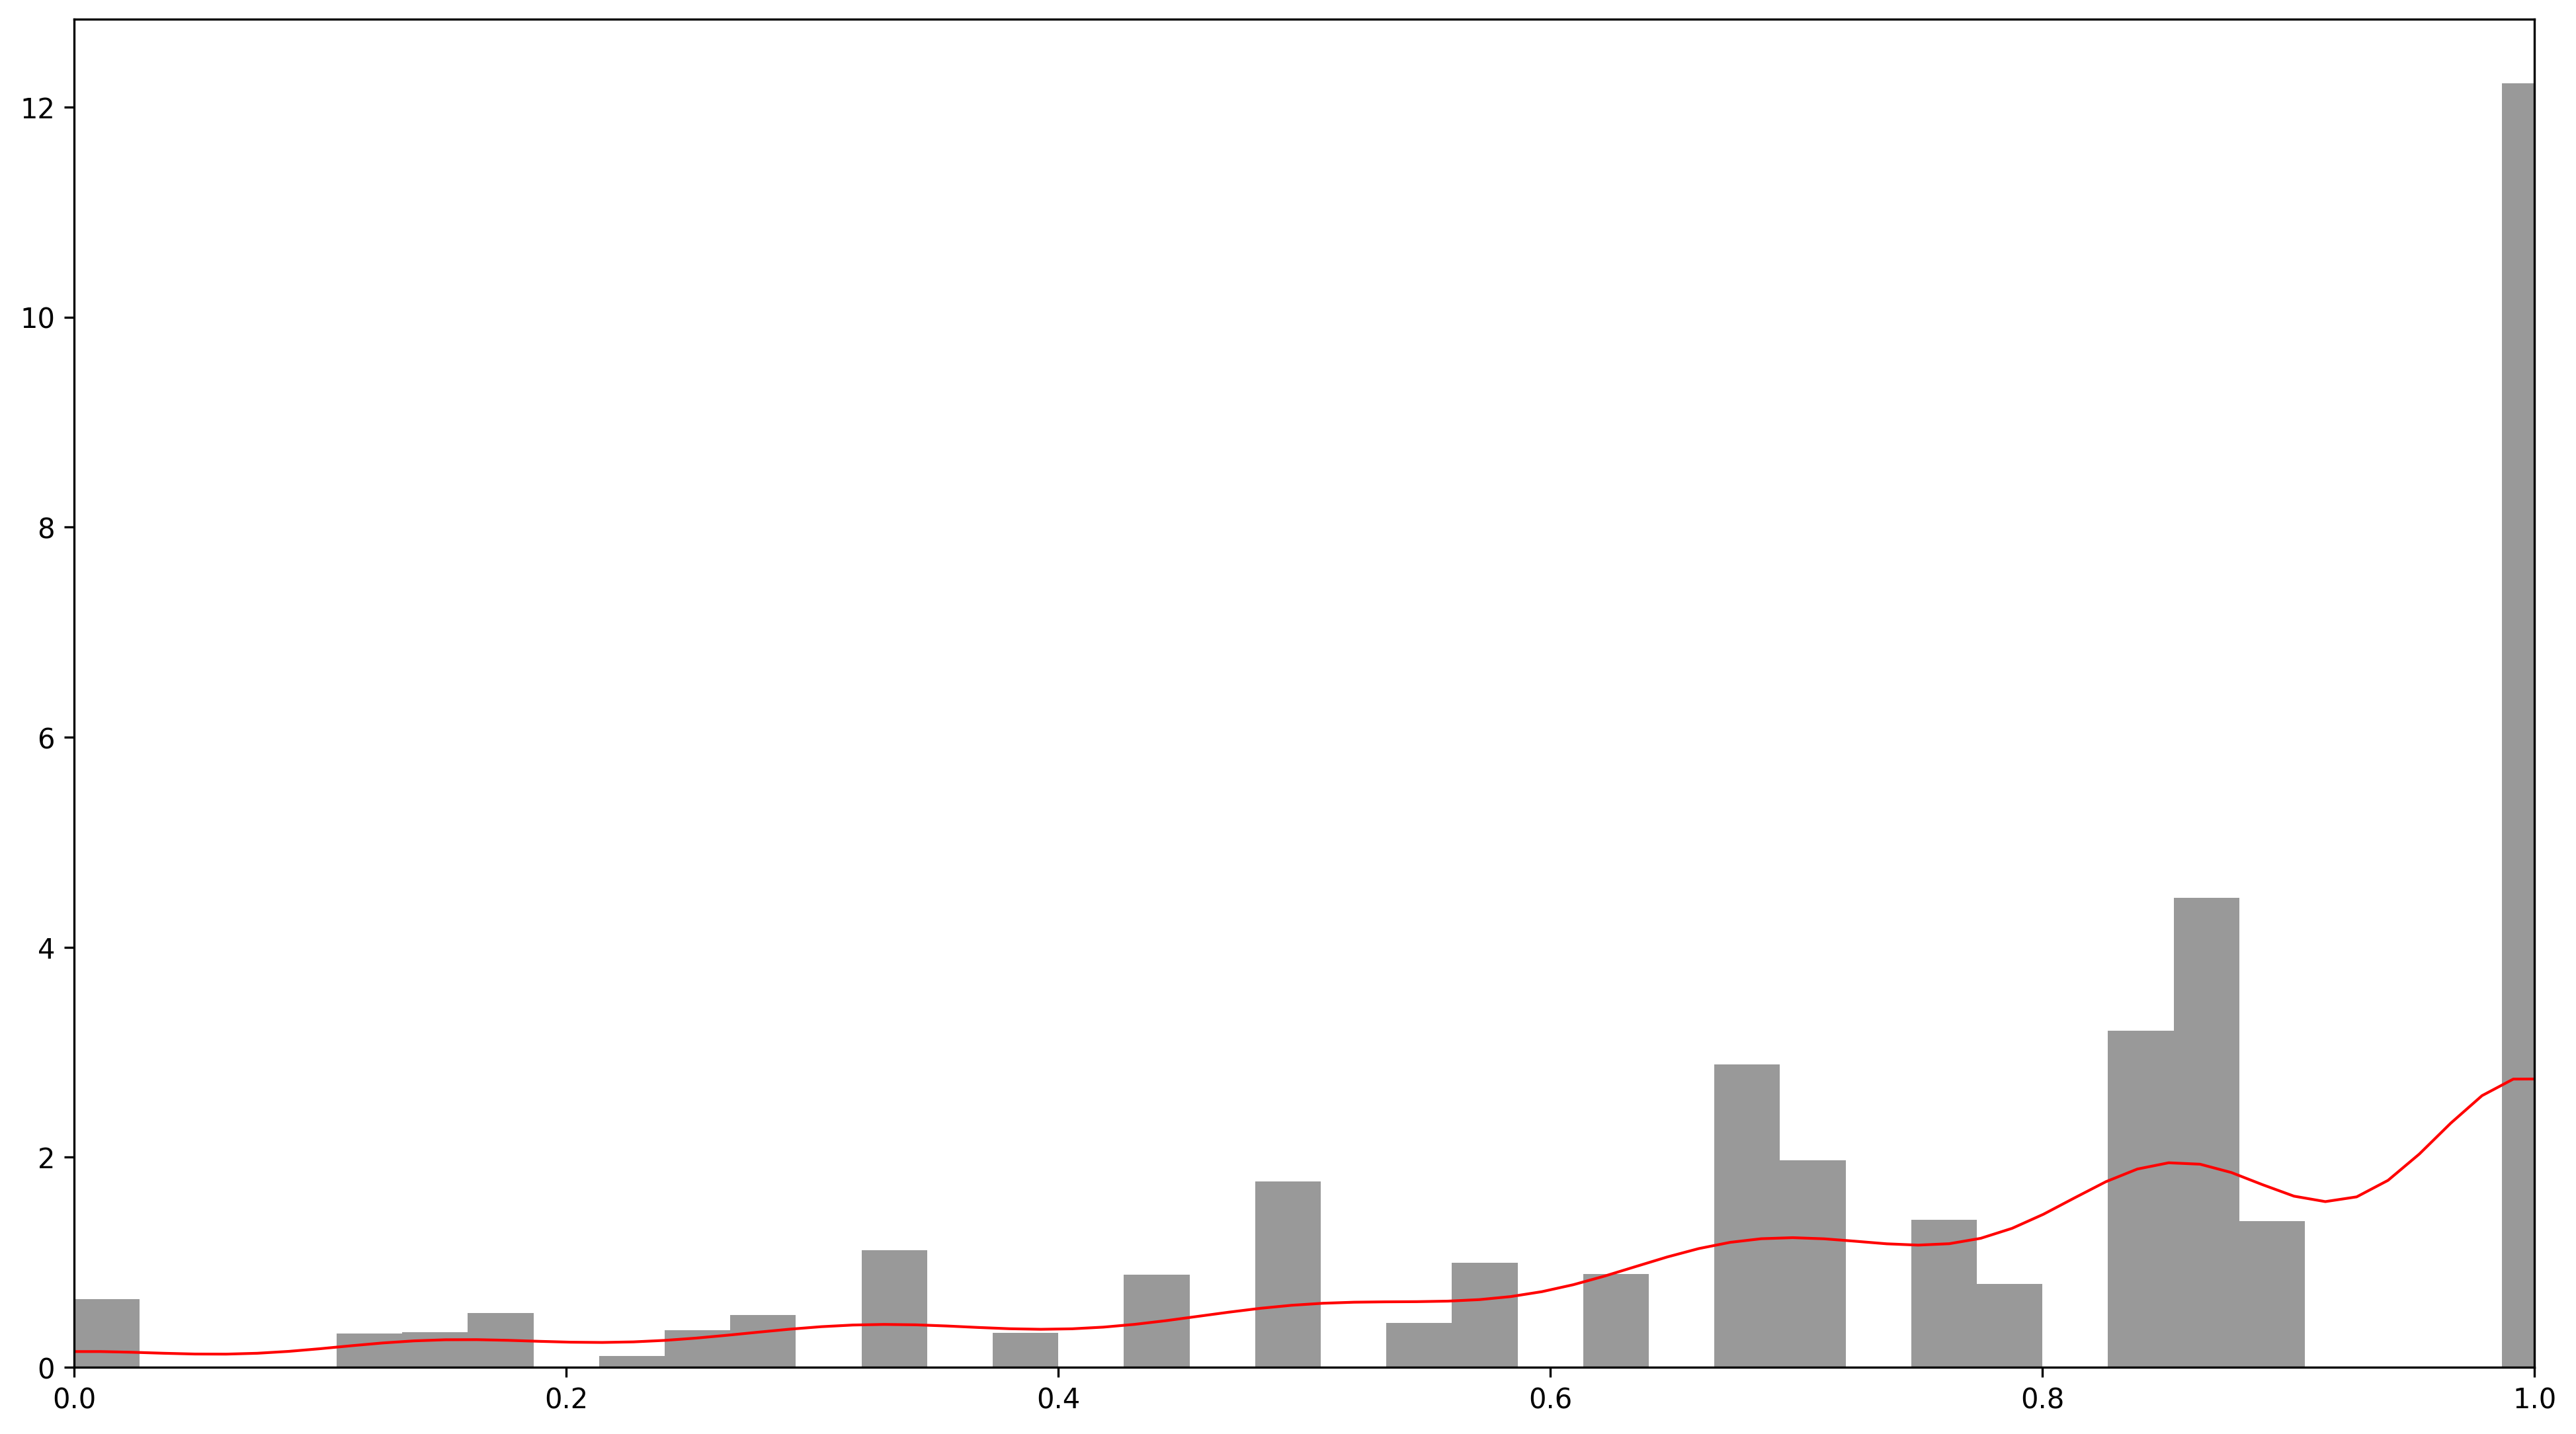

In [38]:
mpl.rc("figure", figsize=(16,9)) 
plt.xlim((0,1))
sns.set_palette("hls")
sns.distplot(helpful_rate,color="r",bins=50, kde_kws={"color":"red", "lw":1 }, hist_kws={ "color": "black" })
plt.savefig('helpfulrate_hist_5.png')
plt.show()

In [39]:
# Use the summary to do a sentiment analysis
# First calculate the score of sentiments
from textblob import TextBlob
summary = original_data['summary'].tolist()
score = []
for text in summary:
    blob = TextBlob(text)
    score.append(blob.sentiment.polarity)

In [45]:
# calculate the mean senitment score of each product
# and then store it in dictionary
original_data['score'] = score
keyname = list(set(original_data['product_name']))
meanscore = dict()
for i in keyname:
    newdf = original_data[original_data['product_name'] == i]
    eachmeanscore = newdf['score'].mean()
    meanscore.update({i :eachmeanscore})

In [56]:
# Randomly select 30 products in asin and check the score
import random
a = meanscore.keys()
a = list(a)
sample_keyname = random.sample(a, 30)

b = []
for i in sample_keyname:
    b.append(meanscore[i])

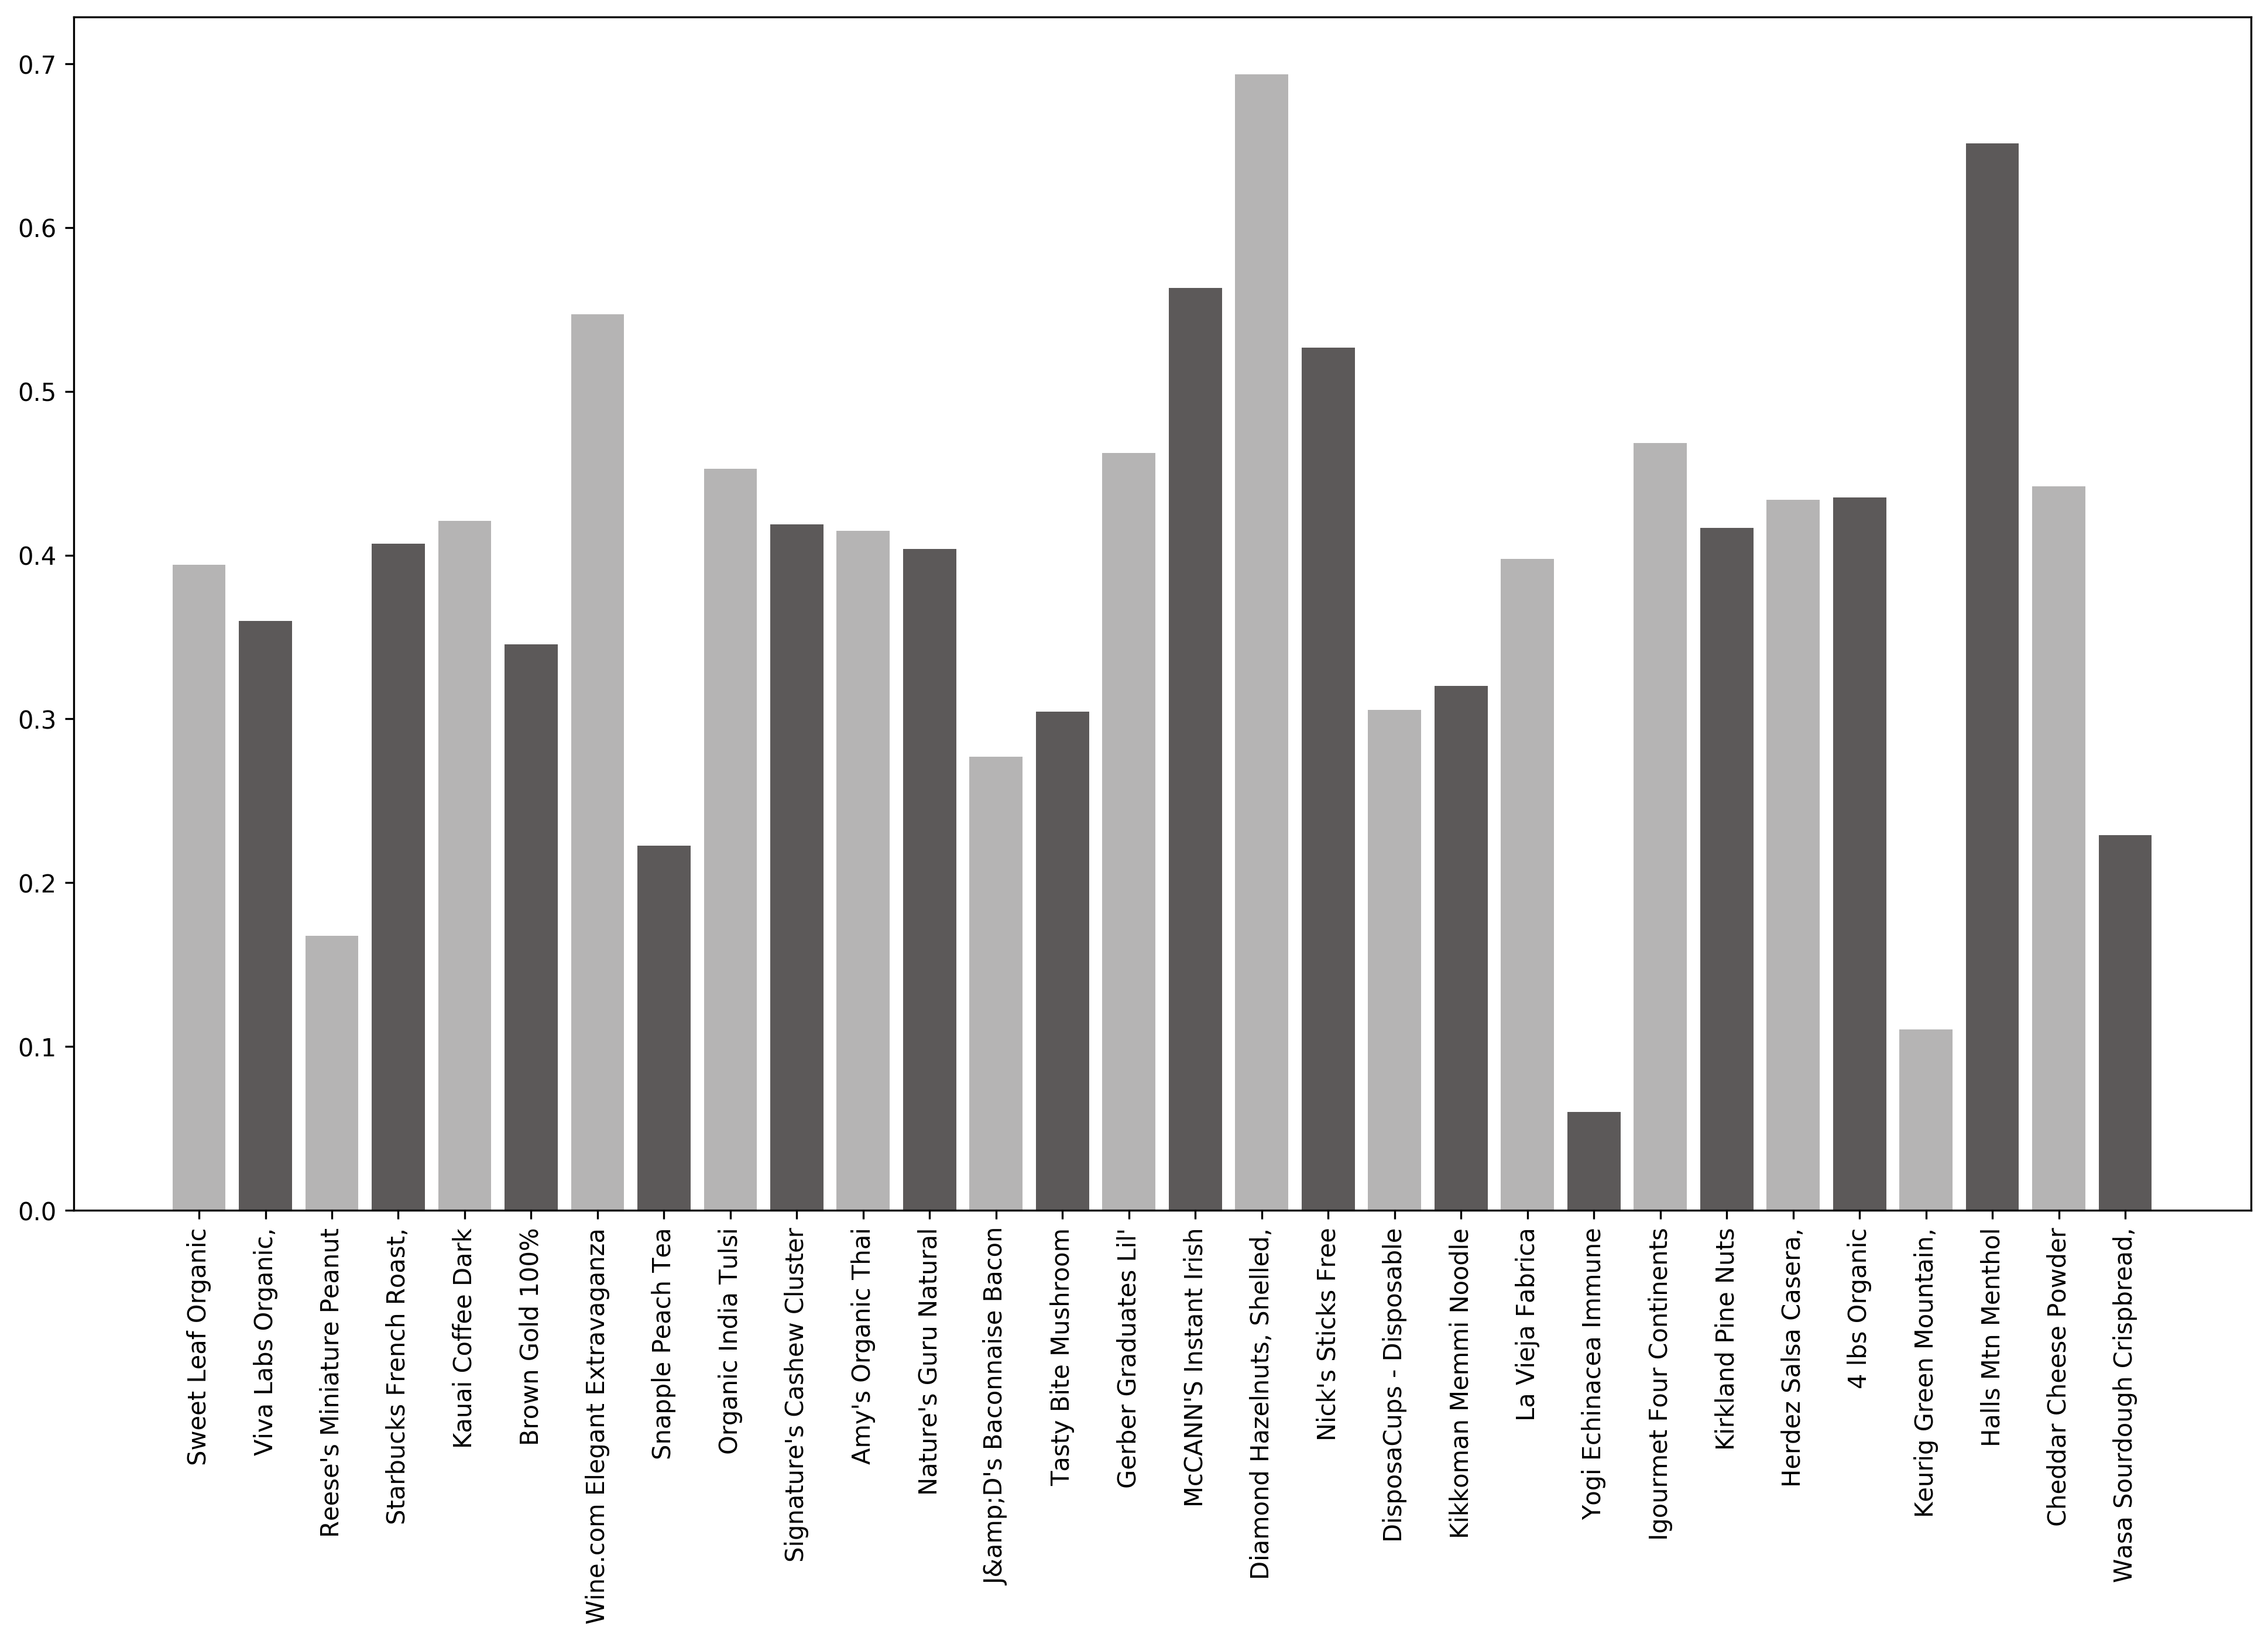

In [61]:
# Plot the scores of the selected product
import pylab as pl

plt.figure(figsize=(16,9))
plt.bar(sample_keyname, b, color=['#a3a1a1','#333030'], alpha = 0.8)
#plt.grid(True)
pl.xticks(rotation=90)
plt.savefig('sample_asin_SentimentScore.png',bbox_inches = 'tight')
plt.show()